<a href="https://colab.research.google.com/github/SushantNiraula/DeepLearning-with-PyTorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook we will work on PyTorch workflow and understand it.

In [1]:
what_are_we_covering={1:'data (prepare and load)',
                      2:'build model',
                      3:'fitting the model to data (training)',
                      4:'making predictions and evaluating a model(inference)',
                      5:'Saving and loading a model',
                      6:'putting it all together. '}
print(what_are_we_covering)

{1: 'data (prepare and load)', 2: 'build model', 3: 'fitting the model to data (training)', 4: 'making predictions and evaluating a model(inference)', 5: 'Saving and loading a model', 6: 'putting it all together. '}


In [2]:
import torch
from torch import nn ## nn
import matplotlib.pyplot as plt


In [3]:
torch.__version__

'2.6.0+cu124'

## 1. Data (Preparing and Loading)

Data can be almost anything.... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.


To showcase this, let's create some known data using linear Regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [4]:
## Create *known* parameters.
weight= 0.7
bias=0.3
## create
start=0
end=1
step=0.02
X= torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
X.shape,y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [6]:
len(X),len(y)

(50, 50)

## Splitting our data to training and test set's

In [7]:
## create a train/test split

train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

## How might we better visualize our data?

This is where the data explorer's moto comes in !

`""Visualize, Visualize , Visualize""`

In [8]:
## Building a function to Visualize our data.
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue.
  plt.scatter(train_data, train_labels, c='b',s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label= 'Test data')
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  # show the legend
  plt.legend(prop={'size':14})

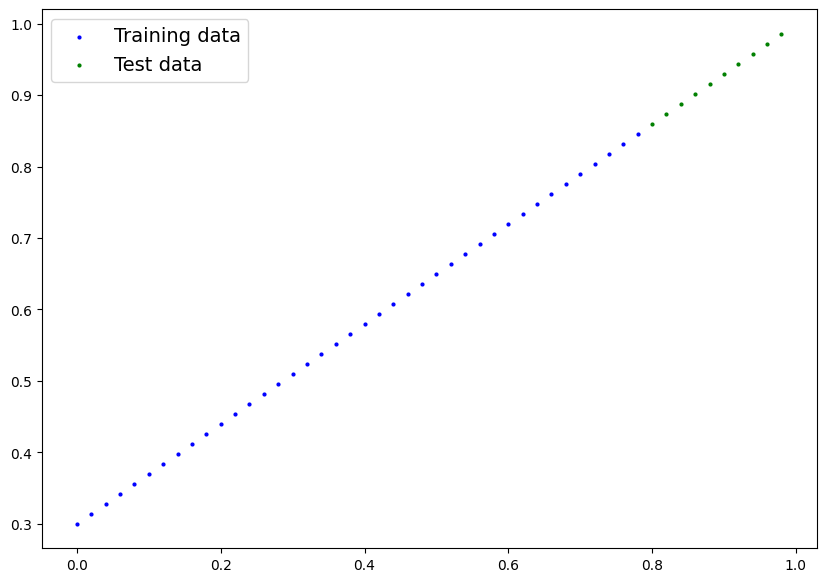

In [9]:
plot_predictions()

## Build model

Our First PyTorch model

In [10]:
## create Linear Regression model class
from torch import nn
class LinearRegressionModel(nn.Module): ## <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

    ## forwared method
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x+ self.bias ## this is a linear regression formula.


In [11]:
## create a random seed
torch.manual_seed(42)

## Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

## check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
with torch.inference_mode():
  pred= model_0(X_test)
pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
## faster one is :
with torch.no_grad():
  pred=model_0(X_test)
pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
pred=model_0.forward(X_test)
pred=pred.detach().numpy()

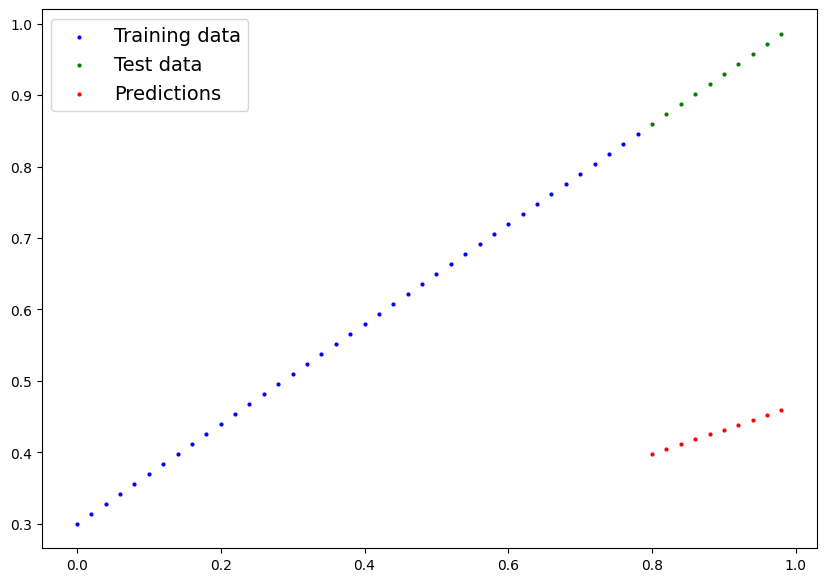

In [16]:
plot_predictions(predictions=pred)


In [17]:
## 3. Train model

# setup a loss function
loss_fn = nn.L1Loss()

## setup an optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.01)

## Building a training and Testing loop
0. Loop through the data
1. Forward pass (this involves data moving throught our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward- move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss.
5. optimizer step **gradient descent**

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

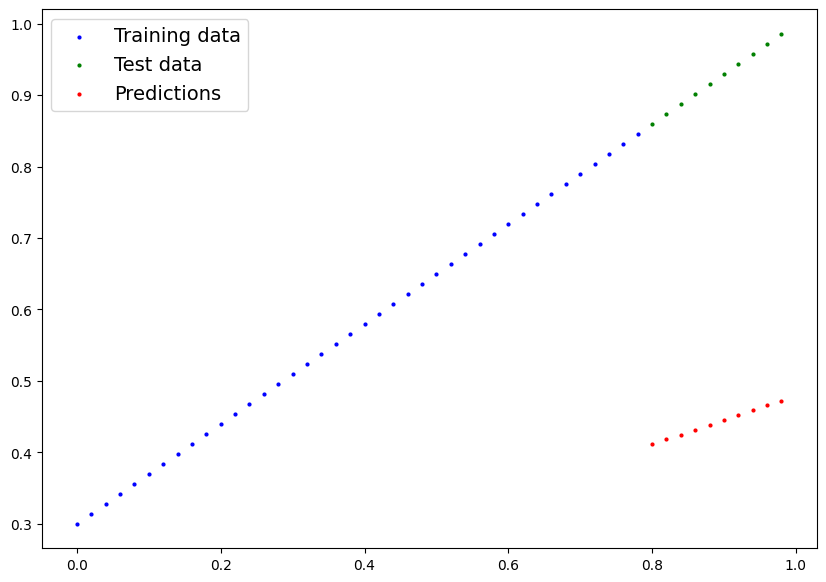

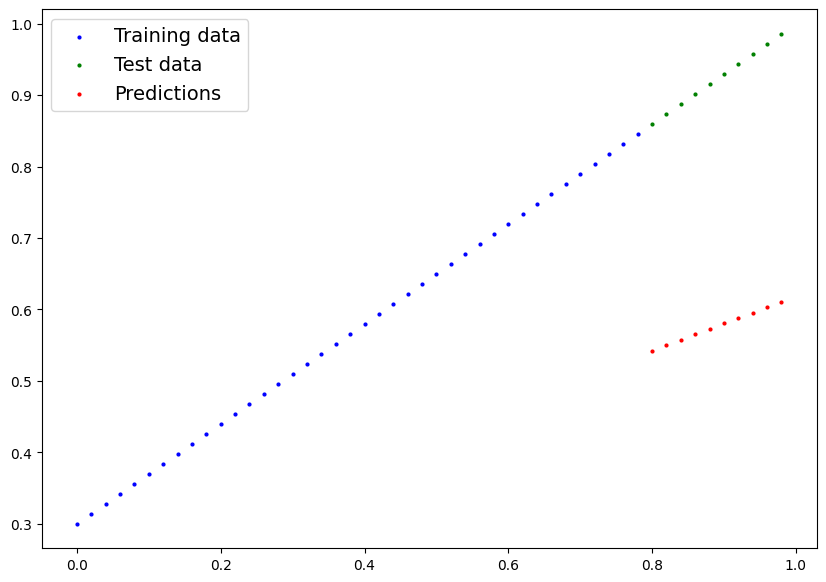

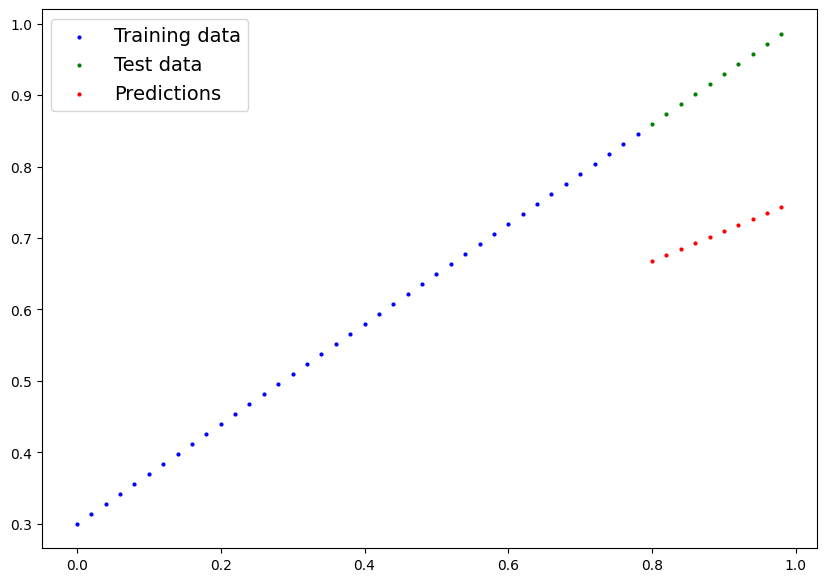

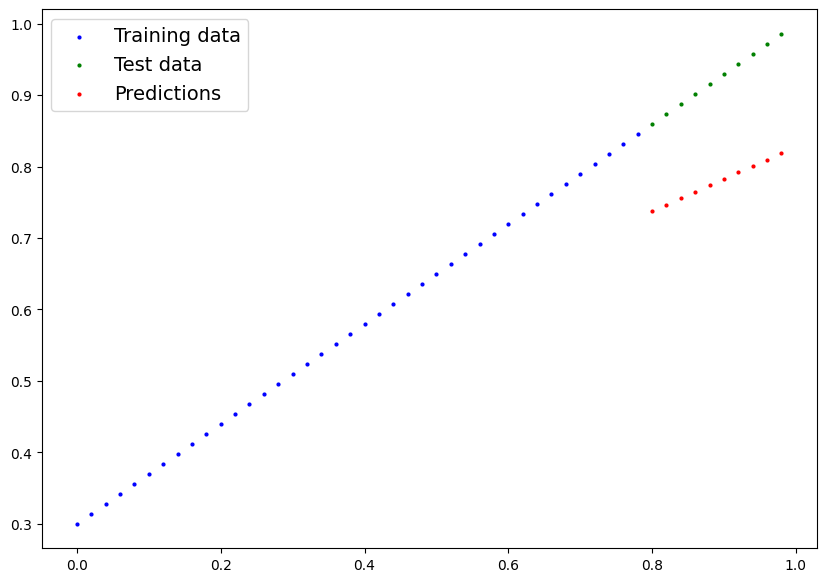

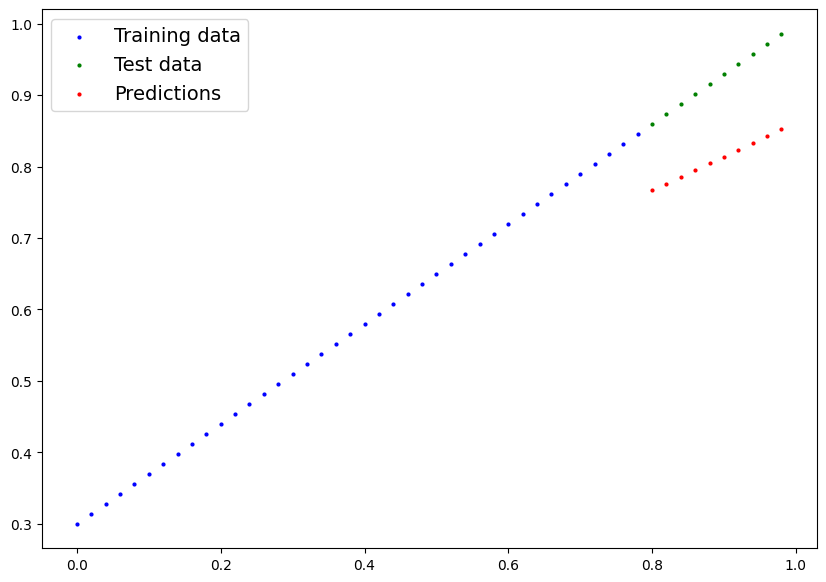

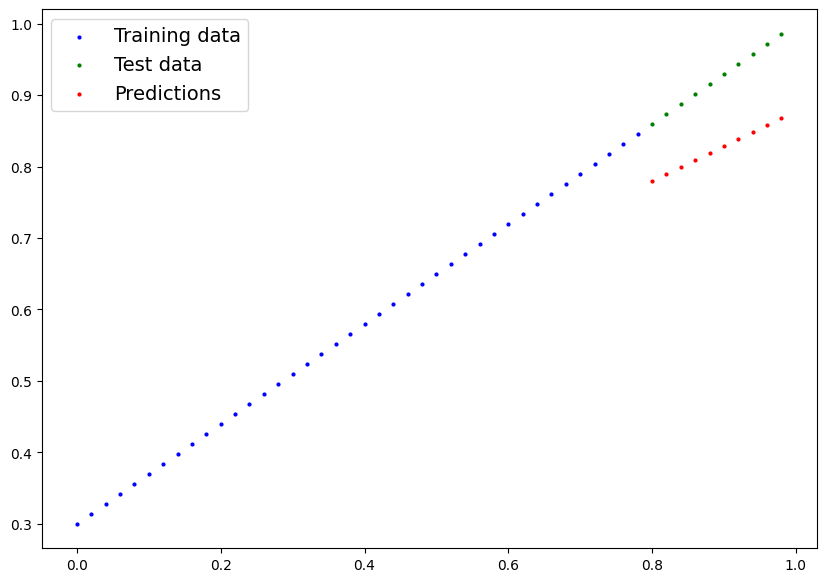

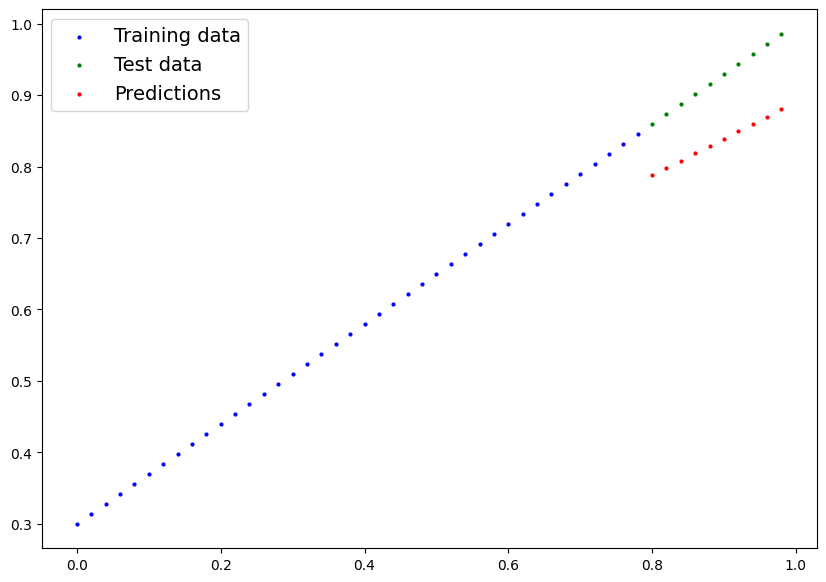

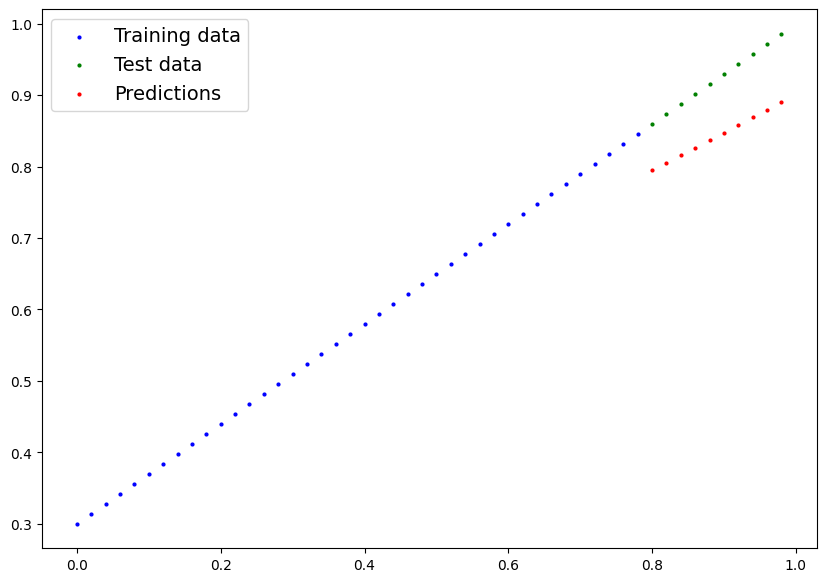

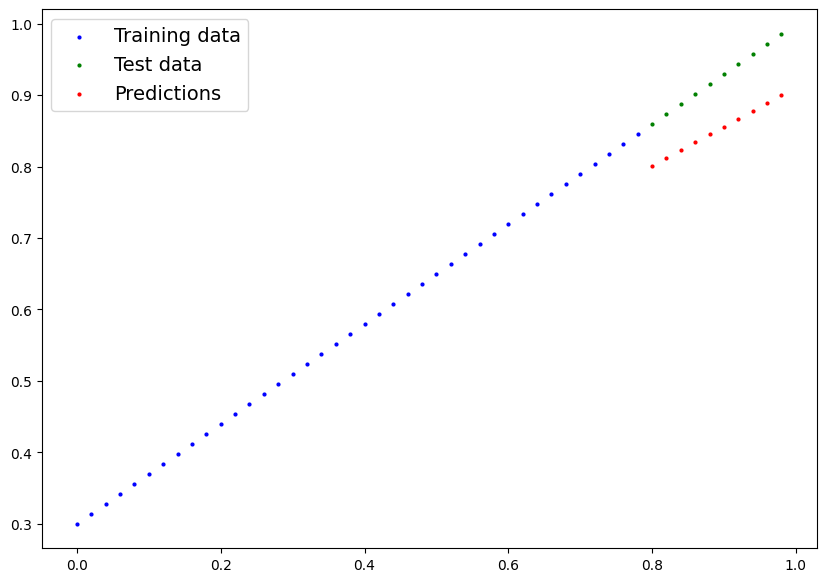

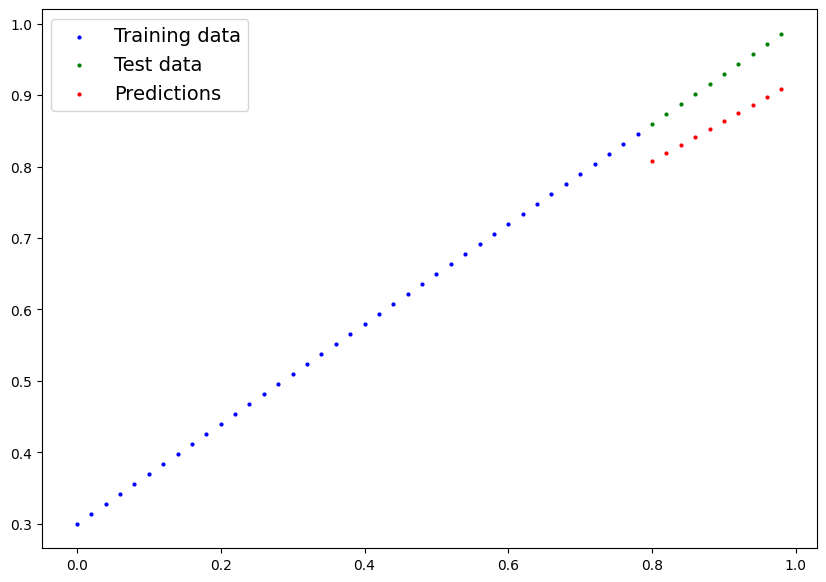

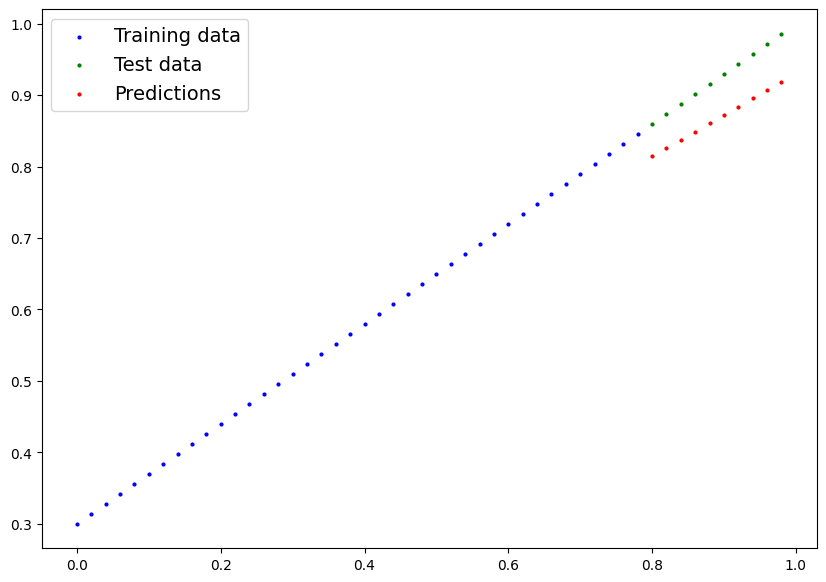

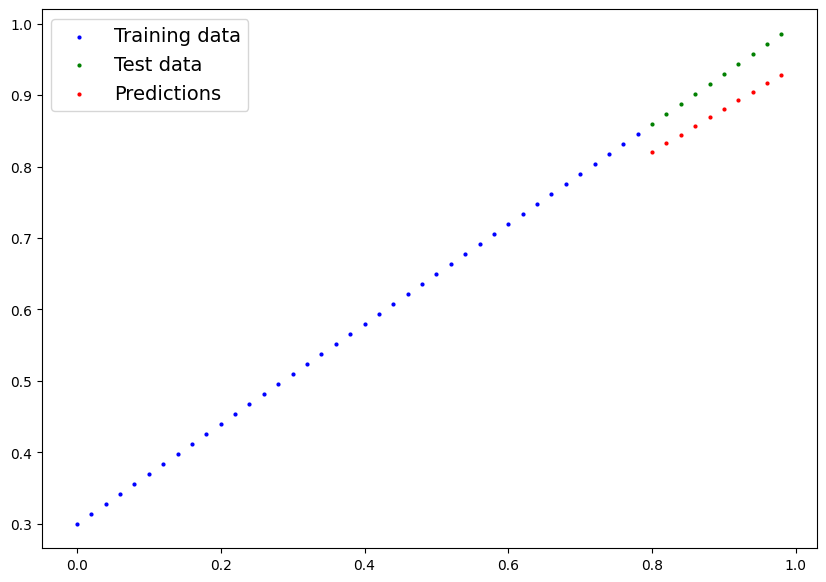

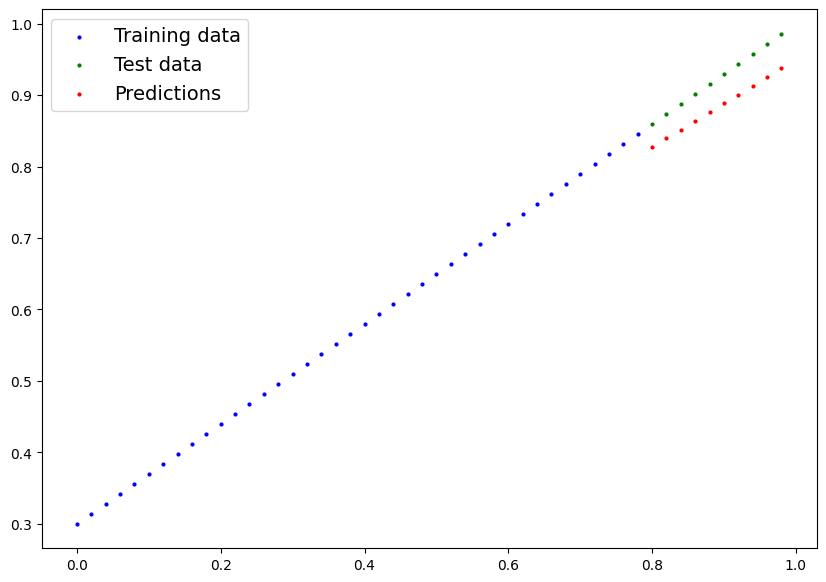

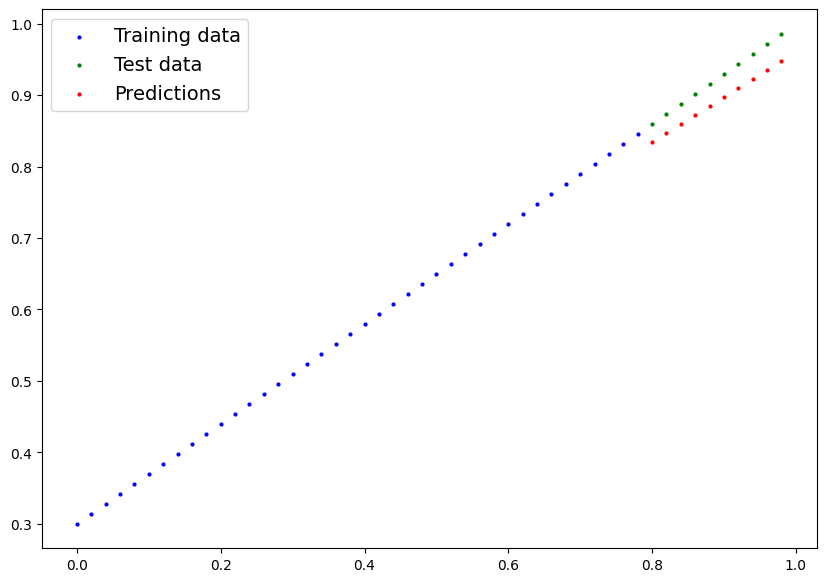

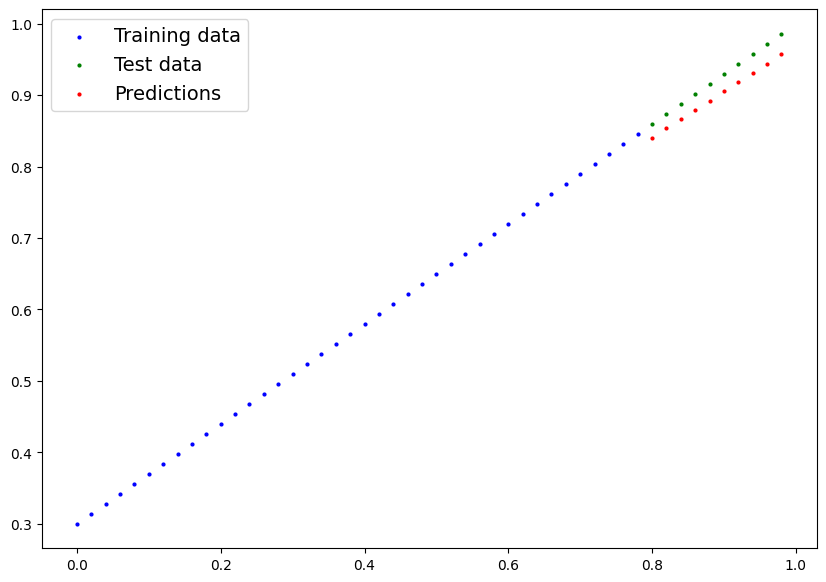

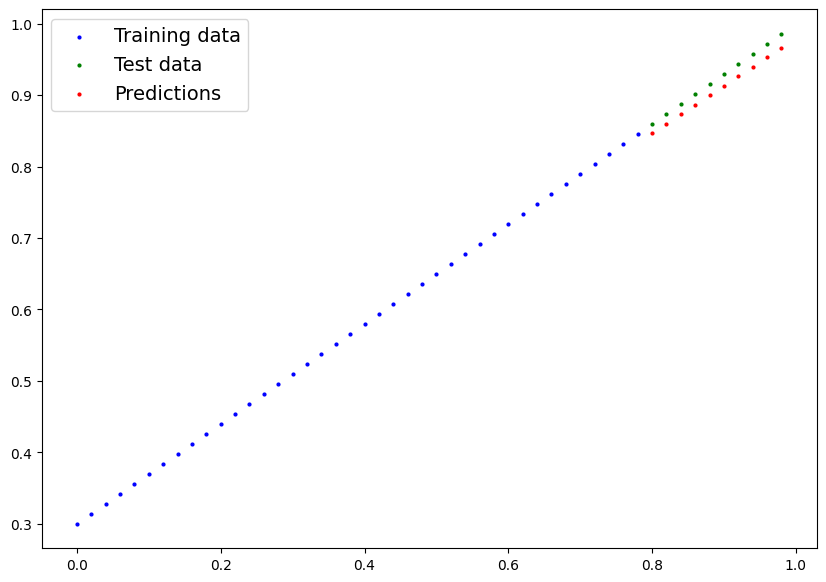

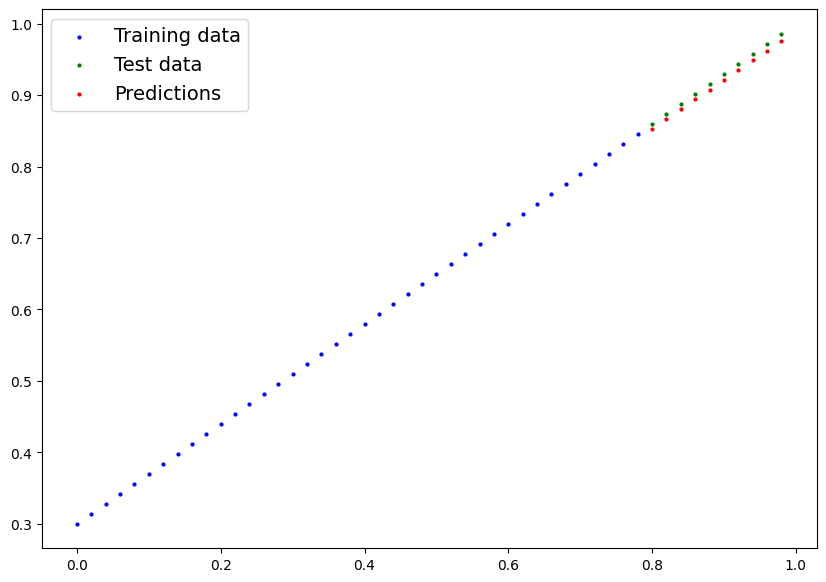

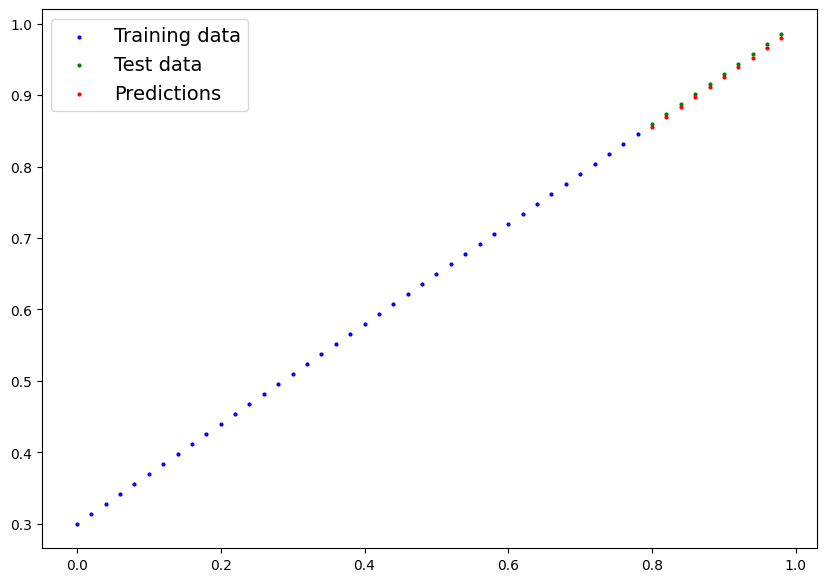

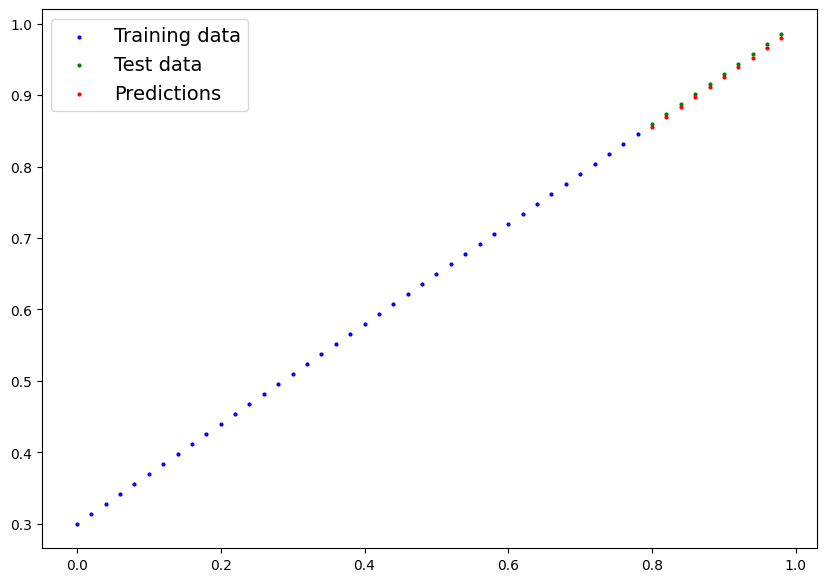

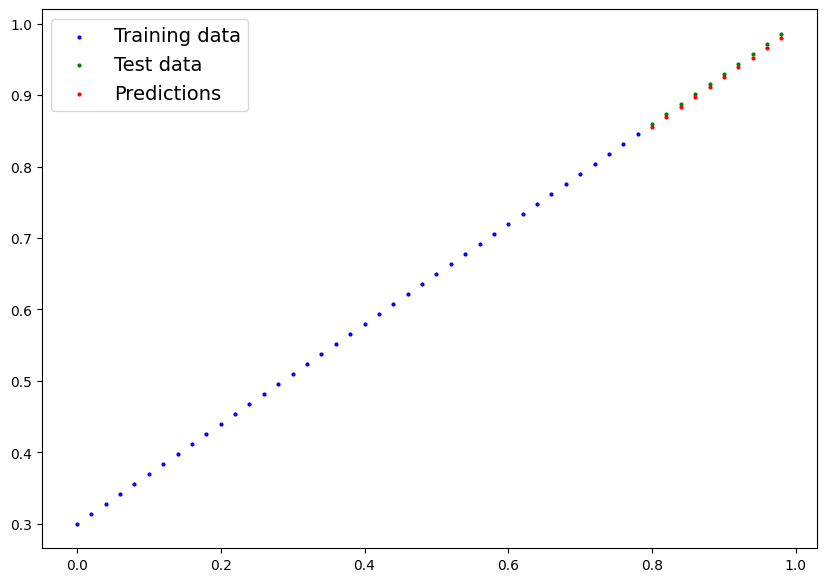

In [19]:
epochs =200

for epoch in range(epochs):
  model_0.train() ## Train mode in pyTorch sets all parameters that require  gradients to
  #1. Forward pass
  y_pred= model_0(X_train)

  #2. Calculate the loss
  loss=loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter.)
  loss.backward()

  #5 .Step the optimizer (perform Gradient Descent)
  optimizer.step()

  ## Testing
  model_0.eval()

  with torch.inference_mode():
    test_pred= model_0(X_test)
    test_loss=loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    print(model_0.state_dict())

    plot_predictions(predictions=test_pred)


In [20]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
y_pred=model_0(X_test)
y_pred=y_pred.detach().numpy()

## saving a model in PyTorch.

-> There are three main methods we should know about for saving and loading model in pytorch.

1. Save a Pytorch object in Python's pickle format. `torch.save()`
2. Load a saved Pytorch object. `torch.load()`
3. To load a model's saved state dictionary. `torch.nn.Module.load_state_dict()`



## PyTorch Recommended.

Save/Load -> `state_dict`

In [22]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH= Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model.
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [23]:
## Loading model.
## we saved the models state dict.
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

# ***Putting it all together.***


In [25]:
## import pytorch and matplotlib
import torch
import matplotlib.pyplot as plt
from torch import nn

In [26]:
torch.__version__

'2.6.0+cu124'

In [28]:
## device-agnostic code.
device= 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


## Creating Data(Dummy)

In [29]:
## Create some data using linear Regression formula of y= weight * X + bias
weight= 0.7
bias=0.3

# create range values.
start =0
end= 1
step= 0.02

## Create X and y (features and label)
X= torch.arange(start,end,step).unsqueeze(dim=1)
y= weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
## Split data into train, test and split.
train_split = int(0.8 * len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [32]:
## Plot the data
## Building a function to Visualize our data.
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue.
  plt.scatter(train_data, train_labels, c='b',s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label= 'Test data')
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  # show the legend
  plt.legend(prop={'size':14})

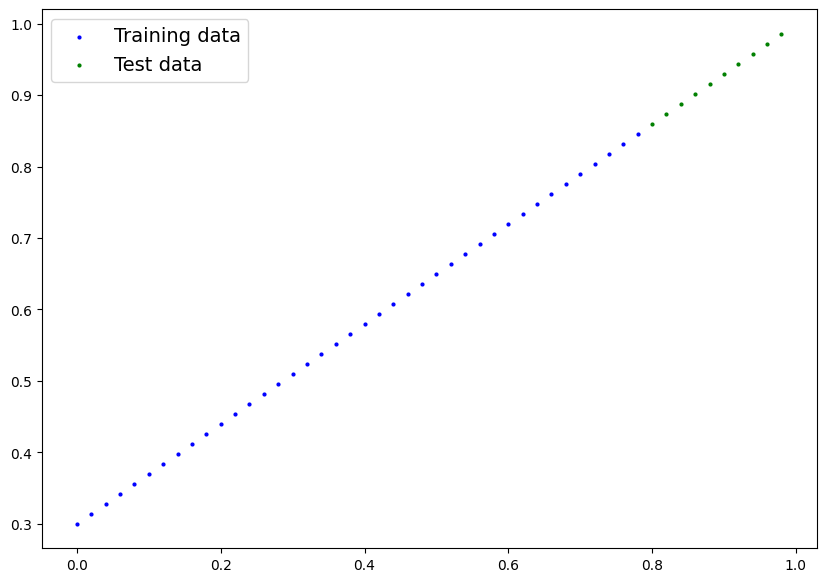

In [33]:
plot_predictions()

## Building a PyTorch Linear Model

In [34]:
## Create a linear Model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    ## Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features =1, out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [35]:
torch.manual_seed(42)
model_1 =LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [36]:
## set the model to use the target device.
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## Training Code

In [38]:
## setup loass function
loss_function= nn.L1Loss()
## setup our Optimizer
optimizer = torch.optim.SGD(lr=0.01, params= model_1.parameters())

## Let's write our traning loop.
torch.manual_seed(42)

## Put data on th target device
X_train= X_train.to(device)
y_train= y_train.to(device)
X_test= X_test.to(device)
y_test= y_test.to(device)

## Training loop
epochs=200
for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred= model_1(X_train)

  #2. Calculate the loss
  loss= loss_function(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. perform Backpropagartion.
  loss.backward()

  #5. optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_function(test_pred, y_test)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## Making and evaluating Predictions

In [41]:
## Turn model into evaluation mode
model_1.eval()

## Make predictions on the test_data
with torch.inference_mode():
  y_pred= model_1(X_test)

In [42]:
y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

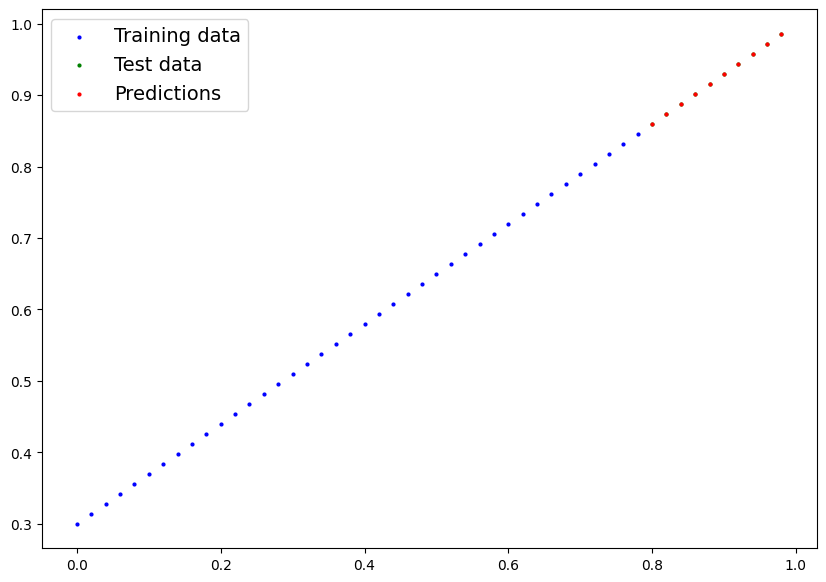

In [43]:
plot_predictions(predictions=y_pred)

In [44]:
## Saving the model
from pathlib import Path
path= Path('models')
path.mkdir(parents=True, exist_ok=True)

## Create model save path
model_name= '01_pytorch_workflow_model_1.pth'
model_save_path= path/ model_name

## Save the model
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_1.state_dict(),
           f=model_save_path)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [45]:
## Load a Pytorch model
loaded_model_1=  LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(model_save_path))

## put the loaded model to device.
loaded_model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [47]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])